* * *
<pre> NYU Paris            <i> Machine Learning - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab: Convolutional Neural Network (CNN) </h1>

<pre align="left"> October 11th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Code your own CNN, see the differences with MLP in term of performance and architectures

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Build your own Convolutional Neural Network 

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

## Loading and preparing the FashionMNIST dataset

In [4]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Question 1: 

Visualize somes images of the dataset.

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


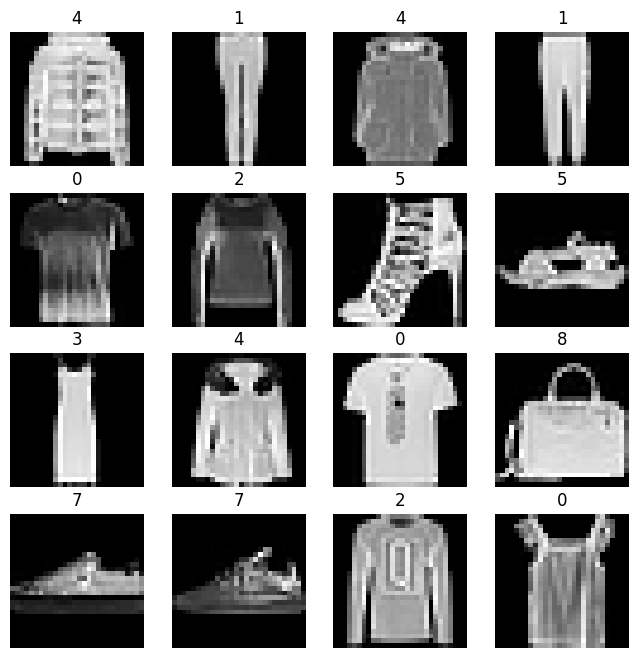

In [5]:
# Visualize some images of the FashionMNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Question 2

Define a dataloader.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

### Question 3: 

Design your own Convolutional Neural Network.

In [7]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, \
    Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Flatten
from torch.optim import Adam, SGD

In [30]:
class ConvNet(nn.Module):   
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cnn_layers = Sequential(
            
            #first we fix a kernel
            #stride is how much you move every step
            #adds a padding so that our kernel multiplies patches on the border with more detail
            #4 is the output channel so we have 4 kernels being learned
            
            # Defining a 2D convolution layer with a kernel of size 3; padding 1, and stride 1.
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            # Defining another 2D convolution layer
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )
        # Define one linear layer
        self.linear_layers = Sequential(
            Flatten(),
            nn.Linear(8 * 28 * 28, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        z = self.cnn_layers(x)
        z = self.linear_layers(z)
        return z

### Question 4

Train your CNN on the training set of FashionMNIST.

In [9]:
convnet = ConvNet()
print(convnet.parameters)

# Optimizer
epochs = 5
learning_rate = 1e-4
optimizer = Adam(convnet.parameters(), lr=learning_rate)

# Choice of the loss
criterion = CrossEntropyLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = convnet(inputs)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()
        
        losses.append(loss.item())

        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)>
0 0 2.2712247371673584
0 2000 0.5236431956291199
0 4000 0.34106409549713135
0 6000 0.1590527892112732
0 8000 0.6691742539405823
0 10000 1.1680182218551636
0 12000 0.5079526901245117
0 14000 0.11319491267204285
1 0 0.519054114818573
1 2000 0.08626102656126022
1 4000 0.16770052909851074
1 6000 0.034127458930015564
1 8000 0.22771099209785461
1 10000 1.2518599033355713
1 12000 0.17458190023899078
1 14000 0.0710642859339714
2 0 0.009113620966672897
2 2000 0.4652773141860962
2 4000 0.6679724454879761
2 6000 0.15397006273269653
2 8000 0.10411037504673004
2 10000 0.4332526624202728
2 12000 0.1981157362461

### Question 5

Inspect the optimization procedure through the loss.

Text(0.5, 0, 'Iterations')

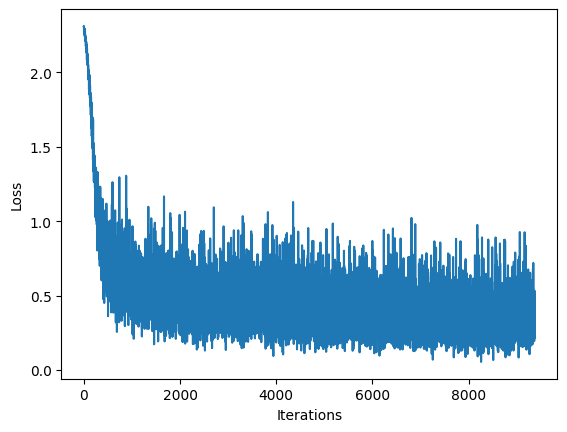

In [18]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iterations")

- Trying out with Batch_size = 32

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [12]:
convnet = ConvNet()
print(convnet.parameters)

# Optimizer
epochs = 5
learning_rate = 1e-4
optimizer = Adam(convnet.parameters(), lr=learning_rate)

# Choice of the loss
criterion = CrossEntropyLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = convnet(inputs)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()
        
        losses.append(loss.item())

        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)>
0 0 2.309800386428833
1 0 0.5021214485168457
2 0 0.23834237456321716
3 0 0.3989149034023285
4 0 0.4052712619304657


Text(0.5, 0, 'Iterations')

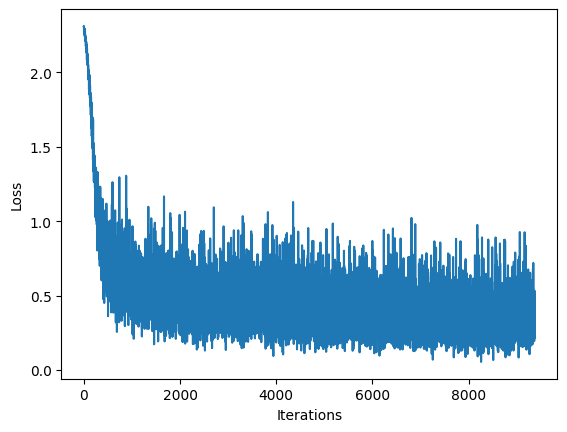

In [19]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iterations")

The loss was very noisy because we picked a very small batch size. When we change it to 32, the loss clearly follows a decreasing fashion.

### Question 6

Quality prediction on the test set.

In [14]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = convnet(inputs)
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.8659)


### Question 7

Train the feed-forward neural network on FashionMnist and compare the accuracy of the CNN and the simple MLP.
Test it for different parameters and comment the performances.

In [15]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)


    # This is implementing the activation fn relu from x to y_pred
    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

In [16]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()
print(mlp.parameters)


# it's a popular algo, gradient descent for nn
optimizer_mlp = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses_mlp = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer_mlp.zero_grad()
        
        # Evaluate the loss
        outputs_mlp = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs_mlp, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer_mlp.step()

        losses_mlp.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.29618501663208
1 0 0.6449022889137268
2 0 0.23388904333114624
3 0 0.32674381136894226
4 0 0.48386669158935547


In [17]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs_mlp = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs_mlp.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.8554)


The accuracy of MLP is less than ConvNN by a little around 1% from the above example, CNN has a better accuracy in general for similar parameters.

Trying epochs = 24

In [20]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

epochs = 24
mlp = MLP()
print(mlp.parameters)


# it's a popular algo, gradient descent for nn
optimizer_mlp = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = cross_entropy # nll_loss

losses_mlp = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer_mlp.zero_grad()
        
        # Evaluate the loss
        outputs_mlp = mlp(inputs.view(inputs.size(0), -1))
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs_mlp, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer_mlp.step()

        losses_mlp.append(loss.item())
        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)>
0 0 2.295051336288452
1 0 0.6236363053321838
2 0 0.3364025950431824
3 0 0.28852537274360657
4 0 0.3848251402378082
5 0 0.36216476559638977
6 0 0.4534735679626465
7 0 0.2213321179151535
8 0 0.48170918226242065
9 0 0.35251012444496155
10 0 0.3171209692955017
11 0 0.22856497764587402
12 0 0.16182126104831696
13 0 0.18131816387176514
14 0 0.13776424527168274
15 0 0.17827916145324707
16 0 0.288286030292511
17 0 0.1659674048423767
18 0 0.2879423201084137
19 0 0.24885182082653046
20 0 0.2099413126707077
21 0 0.10728257894515991
22 0 0.3021761178970337
23 0 0.22721074521541595


In [21]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs_mlp = mlp(inputs.view(inputs.size(0), -1))
    loss, predicted = torch.max(outputs_mlp.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.8823)


Text(0.5, 0, 'Iterations')

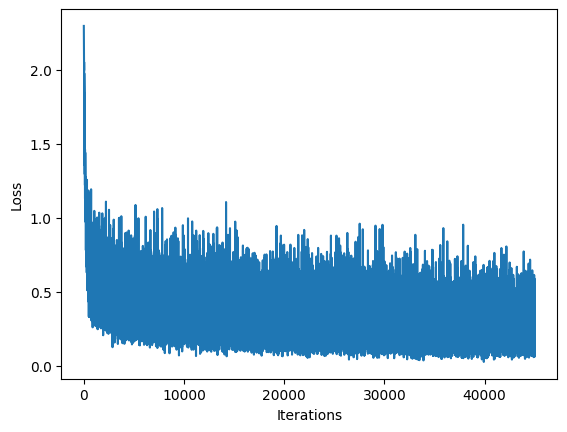

In [32]:
plt.plot(losses_mlp)
plt.ylabel("Loss")
plt.xlabel("Iterations")

By changing the epochs parameter, increasing it by 5x, the accuracy increases by about 3%. This is a good sign since we're not majorly overfitting and we're getting better accuracy. This accuracy is now better than the CNN's (considering its old parameters)

Trying CNN with greater epochs = 24

In [33]:
convnet = ConvNet()
print(convnet.parameters)

# Optimizer
epochs = 24
learning_rate = 1e-4
optimizer = Adam(convnet.parameters(), lr=learning_rate)

# Choice of the loss
criterion = CrossEntropyLoss() # nll_loss

losses = []
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = convnet(inputs)
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # One optimization step
        optimizer.step()
        
        losses.append(loss.item())

        
        if not i % 2000:
            print(t, i, loss.item())

<bound method Module.parameters of ConvNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)>
0 0 2.3101770877838135
1 0 0.4805850088596344
2 0 0.42515799403190613
3 0 0.1918129026889801
4 0 0.4165158271789551
5 0 0.30030134320259094
6 0 0.26010867953300476
7 0 0.3754340708255768
8 0 0.12348295748233795
9 0 0.3860284090042114
10 0 0.3185517489910126
11 0 0.647887647151947
12 0 0.07906907051801682
13 0 0.150272935628891
14 0 0.21998725831508636
15 0 0.43238386511802673
16 0 0.5805332660675049
17 0 0.40316033363342285
18 0 0.21588969230651855
19 0 0.3437124192714691
20 0 0.4050280451774597
21 0 0.2699882388114929
22 0 0.2140958309173584
23 0 0.13595731556415558


In [34]:
size_test = test_data.data.shape[0]

correct = 0
total = 0
for data in testloader:
    inputs, labels = data
    outputs = convnet(inputs)
    loss, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()


final_accuracy =  correct/total

print(final_accuracy)

tensor(0.8837)


Evidently, there's a very slight higher difference between the two. The CNN with greater epochs is still greater than the MLP model with the same number of epochs (even though very slightly). 

## Bonus question: Compare the computational time of MLP and CNN (with same hidden size) using the library ‘‘time''

In [31]:
import torch.optim as optim
from torch.nn import Sequential, Flatten, CrossEntropyLoss
from torch.optim import Adam
import time

# Create ConvNet and MLP models
convnet = ConvNet()
mlp = MLP()

# Optimizers for ConvNet and MLP
convnet_optimizer = Adam(convnet.parameters(), lr=learning_rate)
mlp_optimizer = Adam(mlp.parameters(), lr=learning_rate)

# Loss functions for ConvNet and MLP
convnet_criterion = CrossEntropyLoss()
mlp_criterion = CrossEntropyLoss()

# Number of epochs
epochs = 5

# Training loop for ConvNet
start_time_convnet = time.time()
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        convnet_optimizer.zero_grad()
        outputs = convnet(inputs)
        loss = convnet_criterion(outputs, labels)
        loss.backward()
        convnet_optimizer.step()
        
        if not i % 2000:
            print(f"ConvNet - Epoch [{t + 1}/{epochs}], Batch [{i + 1}/{len(trainloader)}], Loss: {loss.item():.4f}")

end_time_convnet = time.time()
convnet_time = end_time_convnet - start_time_convnet

# Training loop for MLP
start_time_mlp = time.time()
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer_mlp.zero_grad()
        outputs_mlp = mlp(inputs.view(inputs.size(0), -1))
        loss_mlp = criterion(outputs_mlp, labels)
        loss_mlp.backward()
        optimizer_mlp.step()
        
        if not i % 2000:
            print(f"MLP - Epoch [{t + 1}/{epochs}], Batch [{i + 1}/{len(trainloader)}], Loss: {loss_mlp.item():.4f}")

end_time_mlp = time.time()
mlp_time = end_time_mlp - start_time_mlp

print(f"ConvNet Training Time: {convnet_time:.4f} seconds")
print(f"MLP Training Time: {mlp_time:.4f} seconds")

ConvNet - Epoch [1/5], Batch [1/1875], Loss: 2.2883
ConvNet - Epoch [2/5], Batch [1/1875], Loss: 0.4938
ConvNet - Epoch [3/5], Batch [1/1875], Loss: 0.4470
ConvNet - Epoch [4/5], Batch [1/1875], Loss: 0.3419
ConvNet - Epoch [5/5], Batch [1/1875], Loss: 0.2226
MLP - Epoch [1/5], Batch [1/1875], Loss: 2.3099
MLP - Epoch [2/5], Batch [1/1875], Loss: 2.3247
MLP - Epoch [3/5], Batch [1/1875], Loss: 2.3278
MLP - Epoch [4/5], Batch [1/1875], Loss: 2.2921
MLP - Epoch [5/5], Batch [1/1875], Loss: 2.2927
ConvNet Training Time: 67.1243 seconds
MLP Training Time: 14.2826 seconds


As evident above, there's a major computational time difference for a similar size and epochs and Convulational Neural Networks take very long compared to MLP since they contain more complex calculations.